# 📌 IWATSU 測試數據分類腳本使用說明  

本腳本用於 **自動整理 IWATSU 測試數據**，依照 **日期分類** 並將數據 **分類存放**，以便後續分析與機器學習使用。  


## 📂 資料夾結構  

請將 **IWATSU 測試數據** 放入 `RawData` 目錄中。  
⚠ 若 `RawData` 目錄不存在，請自行建立。  

測試數據會按照 **日期 (西元後兩位+月份+日期)** 存放，例如：  




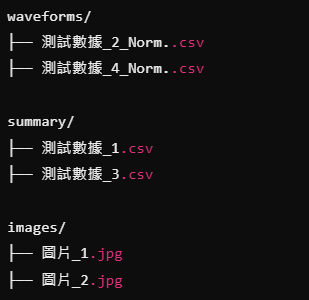



## ⚙️ 程式運作方式  

執行後，程式會 **自動遍歷 `RawData/{日期}` 內的所有子目錄與檔案**，並根據檔案類型分類：  

- **📁 `waveforms/`** → 單點波形數據 (`_Norm..csv`)  
- **📁 `summary/`** → IWATSU 總表 (`.csv`，但非 `_Norm.csv`)  
- **📁 `images/`** → 測試圖片 (`.jpg`)  


## 📢 注意事項  

1. **日期格式須符合 `YYMMDD` (西元後兩位+月份+日期)**  
   - 例如 `250312` 代表 **2025 年 3 月 12 日**。  

2. **波形檔案需符合 `_Norm..csv` 或 `_Norm.csv` 命名規則**  
   - **確保 `_Norm..csv` 與 `_Norm.csv` 是否一致**，避免錯誤分類。  

3. **執行前請確認 `RawData/{日期}` 內的測試數據已準備好**  


## 🚀 執行方式  

1. **確保 Python 環境可用**  
2. **放入測試數據 (`RawData/{日期}`)**  
3. **執行腳本**  

### 檔案移動

In [1]:
%reset -f  # 清空所有變數
import gc
gc.collect()  # 強制 Python 回收記憶體

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  清空所有變數, please run `%reset?` for details


0

In [2]:
import os
import shutil

date = "250423"

# 設定來源資料夾 (包含子目錄)
source_root = os.path.join(".", "RawData", date)
# 目標資料夾
waveform_dir = "waveforms"
summary_dir = "summary"
image_dir = "images"

# 建立目標資料夾
os.makedirs(waveform_dir, exist_ok=True)
os.makedirs(summary_dir, exist_ok=True)
os.makedirs(image_dir, exist_ok=True)

# 遍歷 `source_root` 下的所有子目錄與檔案
for root, dirs, files in os.walk(source_root):
    for file in files:
        file_path = os.path.join(root, file)

        # 判斷是否為單點波形數據 (_Norm..csv)
        #       if file.endswith("_Norm.csv"):  #!結尾.csv，注意file name
        if file.endswith("_Norm..csv"):  #!結尾為..csv，注意file name
            shutil.move(file_path, os.path.join(waveform_dir, file))

        # IWATSU 總表
        elif file.endswith(".csv") and not file.endswith("_Norm.csv"):
            shutil.move(file_path, os.path.join(summary_dir, file))

        # IWATSU 圖片
        elif file.endswith(".jpg"):
            shutil.move(file_path, os.path.join(image_dir, file))

print("檔案移動完成！")


檔案移動完成！


### 檔案Copy

In [3]:
# import os
# import shutil

# date = "250318"

# # 設定來源資料夾 (包含子目錄)
# source_root = os.path.join(".", "RawData", date)
# # 目標資料夾
# waveform_dir = "waveforms"
# summary_dir = "summary"
# image_dir = "images"

# # 建立目標資料夾
# os.makedirs(waveform_dir, exist_ok=True)
# os.makedirs(summary_dir, exist_ok=True)
# os.makedirs(image_dir, exist_ok=True)

# # 遍歷 `source_root` 下的所有子目錄與檔案
# for root, dirs, files in os.walk(source_root):
#     for file in files:
#         file_path = os.path.join(root, file)

#         # 判斷是否為單點波形數據 (_Norm..csv)
#         #       if file.endswith("_Norm.csv"):  #!結尾.csv，注意file name
#         if file.endswith("_Norm..csv"):  #!結尾為..csv，注意file name
#             shutil.copy2(file_path, os.path.join(waveform_dir, file))

#         # IWATSU 總表
#         elif file.endswith(".csv") and not file.endswith("_Norm.csv"):
#             shutil.copy2(file_path, os.path.join(summary_dir, file))

#         # IWATSU 圖片
#         elif file.endswith(".jpg"):
#             shutil.copy2(file_path, os.path.join(image_dir, file))

# print("檔案移動完成！")
